# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **0.5p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **0.5p**

- Check for missing values and report the number and percentage of missing data for each column. **0.5p**

- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. **0.5p**

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. **0.5p**

- Identify outliers in at least one numerical column using boxplots. **0.5p**

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. **0.5p**

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. **0.5p**

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. **0.5p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **0.5p**

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [16]:
import pandas as pd

In [17]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample()

age workclass  fnlwgt education  education-num marital-status  \
19284   41         ?  344572   HS-grad              9       Divorced   

      occupation relationship   race     sex  capital-gain  capital-loss  \
19284          ?    Unmarried  White  Female             0             0   

       hours-per-week native-country income  
19284              40  United-States  <=50K

In [18]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

Categorical Columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Numerical Columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

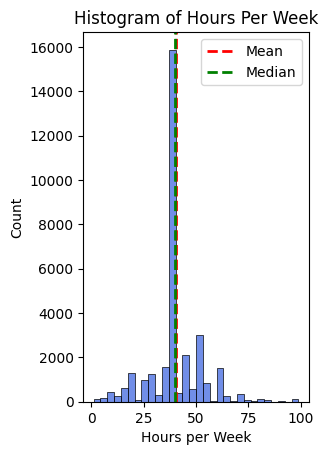

In [19]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data["hours-per-week"], bins=30, kde=False, color="royalblue")
plt.axvline(data["hours-per-week"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(data["hours-per-week"].median(), color='green', linestyle='dashed', linewidth=2, label="Median")
plt.title("Histogram of Hours Per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Count")
plt.legend()

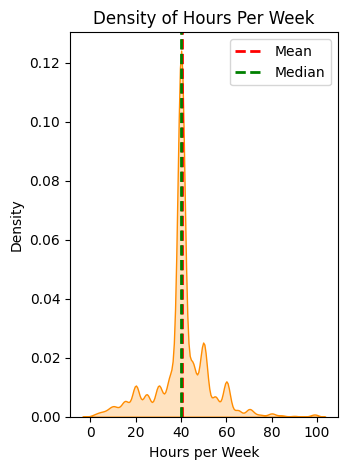

In [20]:
# Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data["hours-per-week"], fill=True, color="darkorange") 
plt.axvline(data["hours-per-week"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(data["hours-per-week"].median(), color='green', linestyle='dashed', linewidth=2, label="Median")
plt.title("Density of Hours Per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)

# Missing values per column
missing_values = data.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

missing_data = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percentage
})

missing_data = missing_data[missing_data["Missing Values"] > 0]

print("Missing Values:")
print(missing_data)

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
Missing Values:
Empty DataFrame
Columns: [Missing Values, Perce

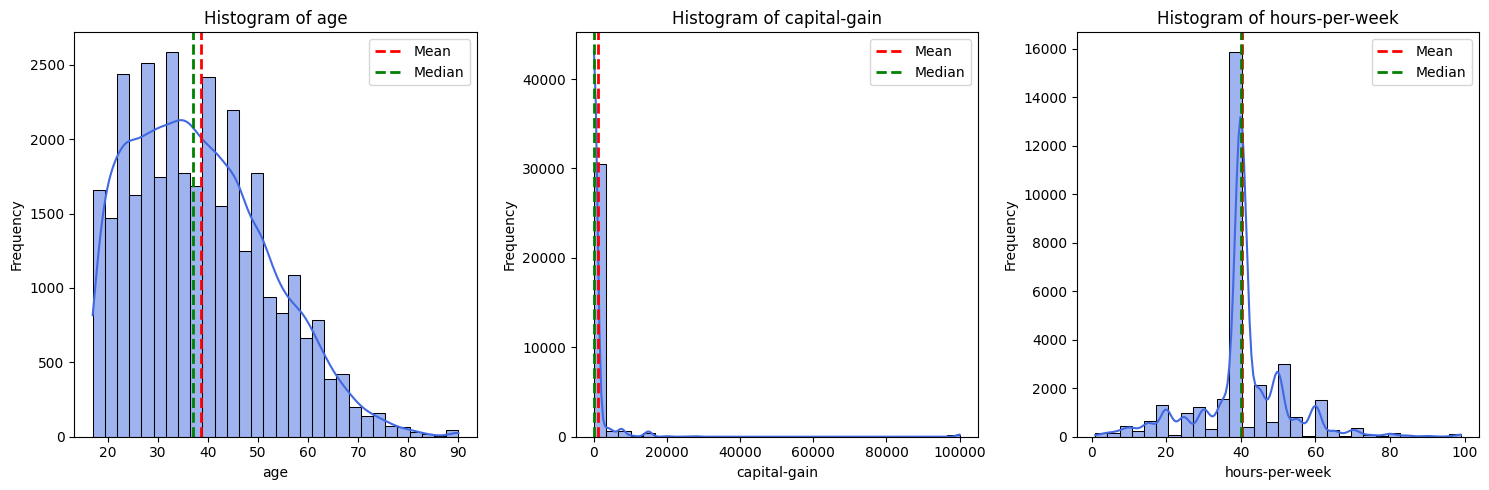

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ["age", "capital-gain", "hours-per-week"]

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i) 
    sns.histplot(data[col], bins=30, kde=True, color="royalblue") 
    plt.axvline(data[col].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
    plt.axvline(data[col].median(), color='green', linestyle='dashed', linewidth=2, label="Median")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()

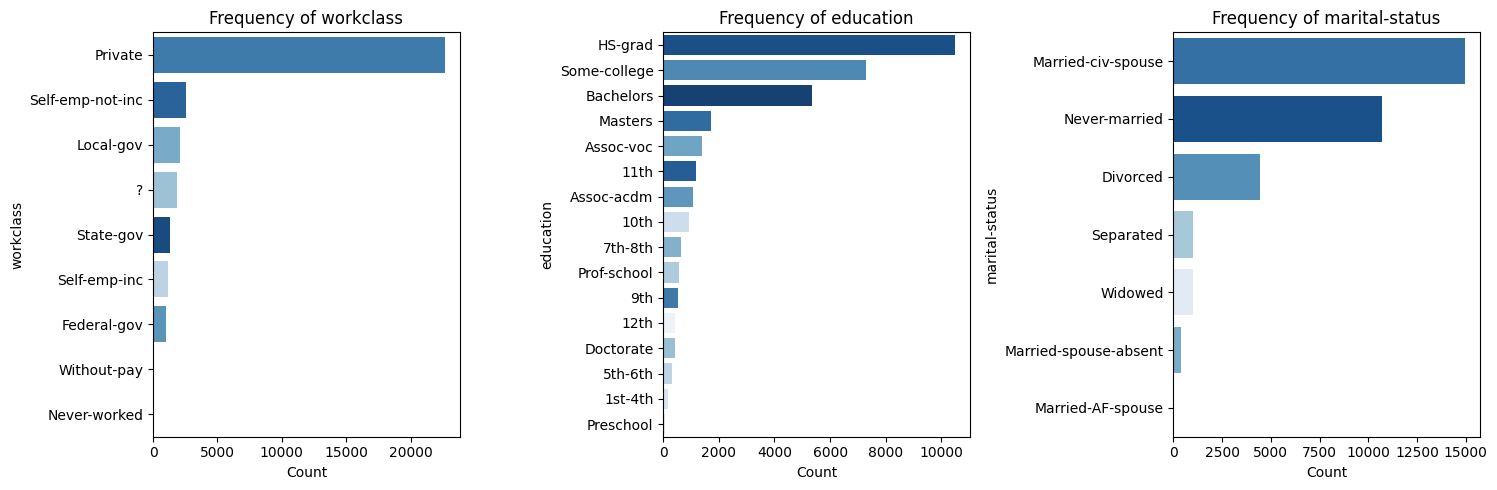

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ["workclass", "education", "marital-status"]

plt.figure(figsize=(15, 5))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)  
    sns.countplot(
        y=data[col], 
        order=data[col].value_counts().index, 
        hue=data[col],  
        dodge=False, 
        palette="Blues_r", 
        legend=False  
    )
    plt.title(f"Frequency of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)


plt.tight_layout()
plt.show()

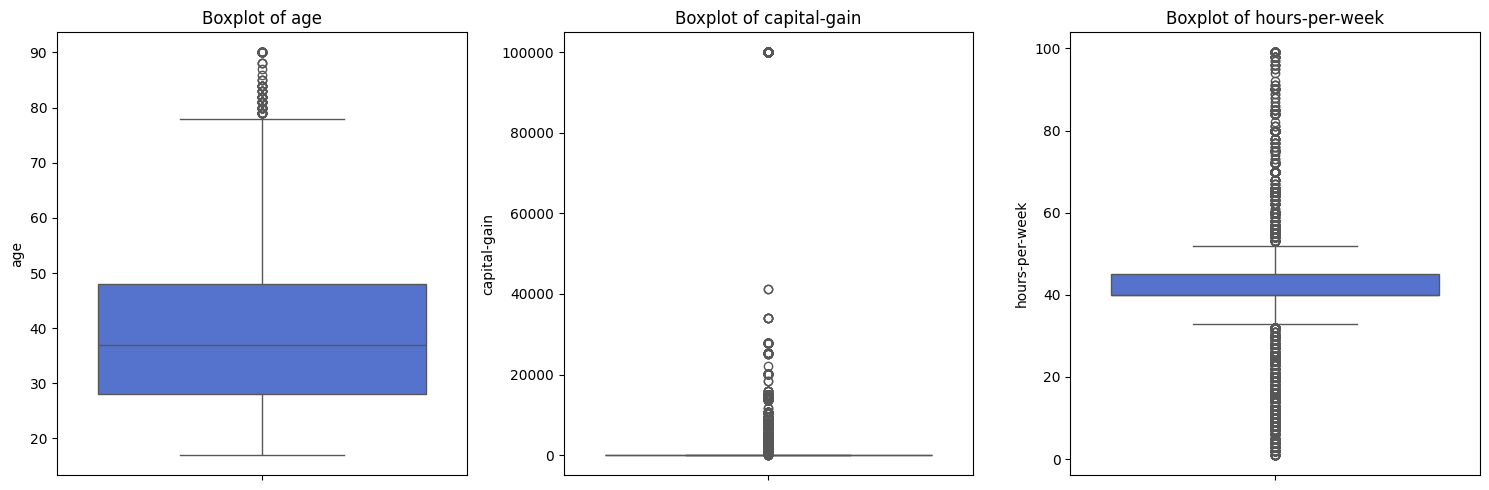

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ["age", "capital-gain", "hours-per-week"]

plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i) 
    sns.boxplot(y=data[col], color="royalblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


Correlation with hours-per-week:
 hours-per-week    1.000000
education-num     0.148123
capital-gain      0.078409
age               0.068756
capital-loss      0.054256
fnlwgt           -0.018768
Name: hours-per-week, dtype: float64


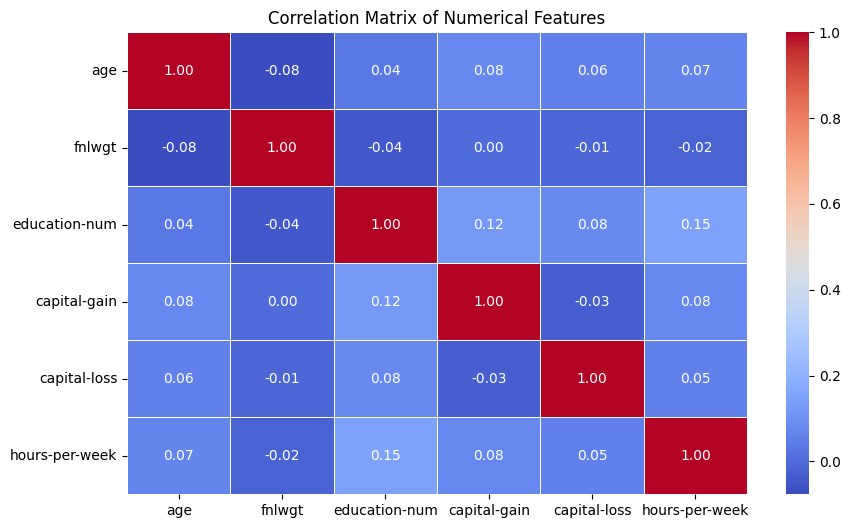

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_data = data.select_dtypes(include=["number"])
correlation_matrix = numerical_data.corr()

target_corr = correlation_matrix["hours-per-week"].sort_values(ascending=False)
print("Correlation with hours-per-week:\n", target_corr)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

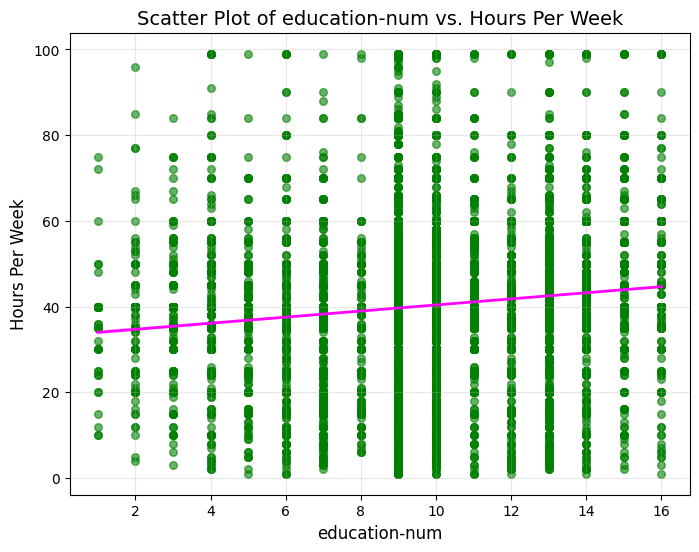

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

most_correlated = "education-num"

plt.figure(figsize=(8, 6))
sns.regplot(
    x=data[most_correlated],
    y=data["hours-per-week"],
    scatter_kws={'alpha': 0.6, 's': 30, 'color': 'green'},
    line_kws={"color": "magenta", "linewidth": 2}, 
)
plt.title(f"Scatter Plot of {most_correlated} vs. Hours Per Week", fontsize=14)
plt.xlabel(most_correlated, fontsize=12)
plt.ylabel("Hours Per Week", fontsize=12)
plt.grid(alpha=0.3)  # Add grid with low opacity
plt.show()

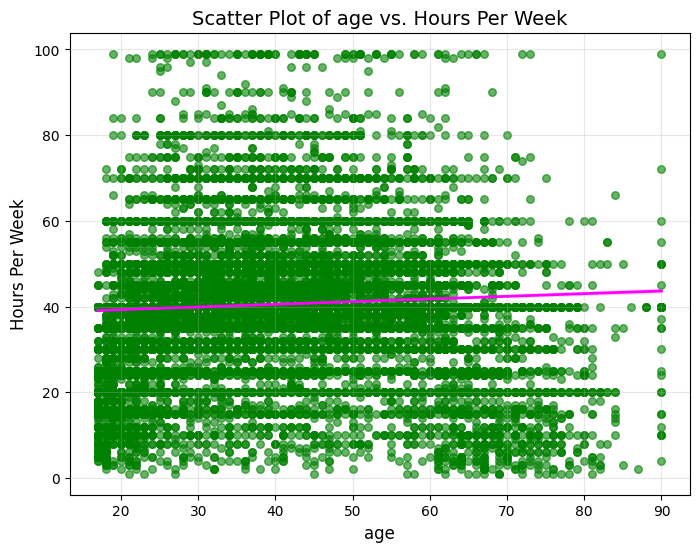

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

new_correlated = "age" 

plt.figure(figsize=(8, 6))
sns.regplot(
    x=data[new_correlated],
    y=data["hours-per-week"],
    scatter_kws={'alpha': 0.6, 's': 30, 'color': 'green'},  
    line_kws={"color": "magenta", "linewidth": 2}, 
)
plt.title(f"Scatter Plot of {new_correlated} vs. Hours Per Week", fontsize=14)
plt.xlabel(new_correlated, fontsize=12)
plt.ylabel("Hours Per Week", fontsize=12)
plt.grid(alpha=0.3)  
plt.show()

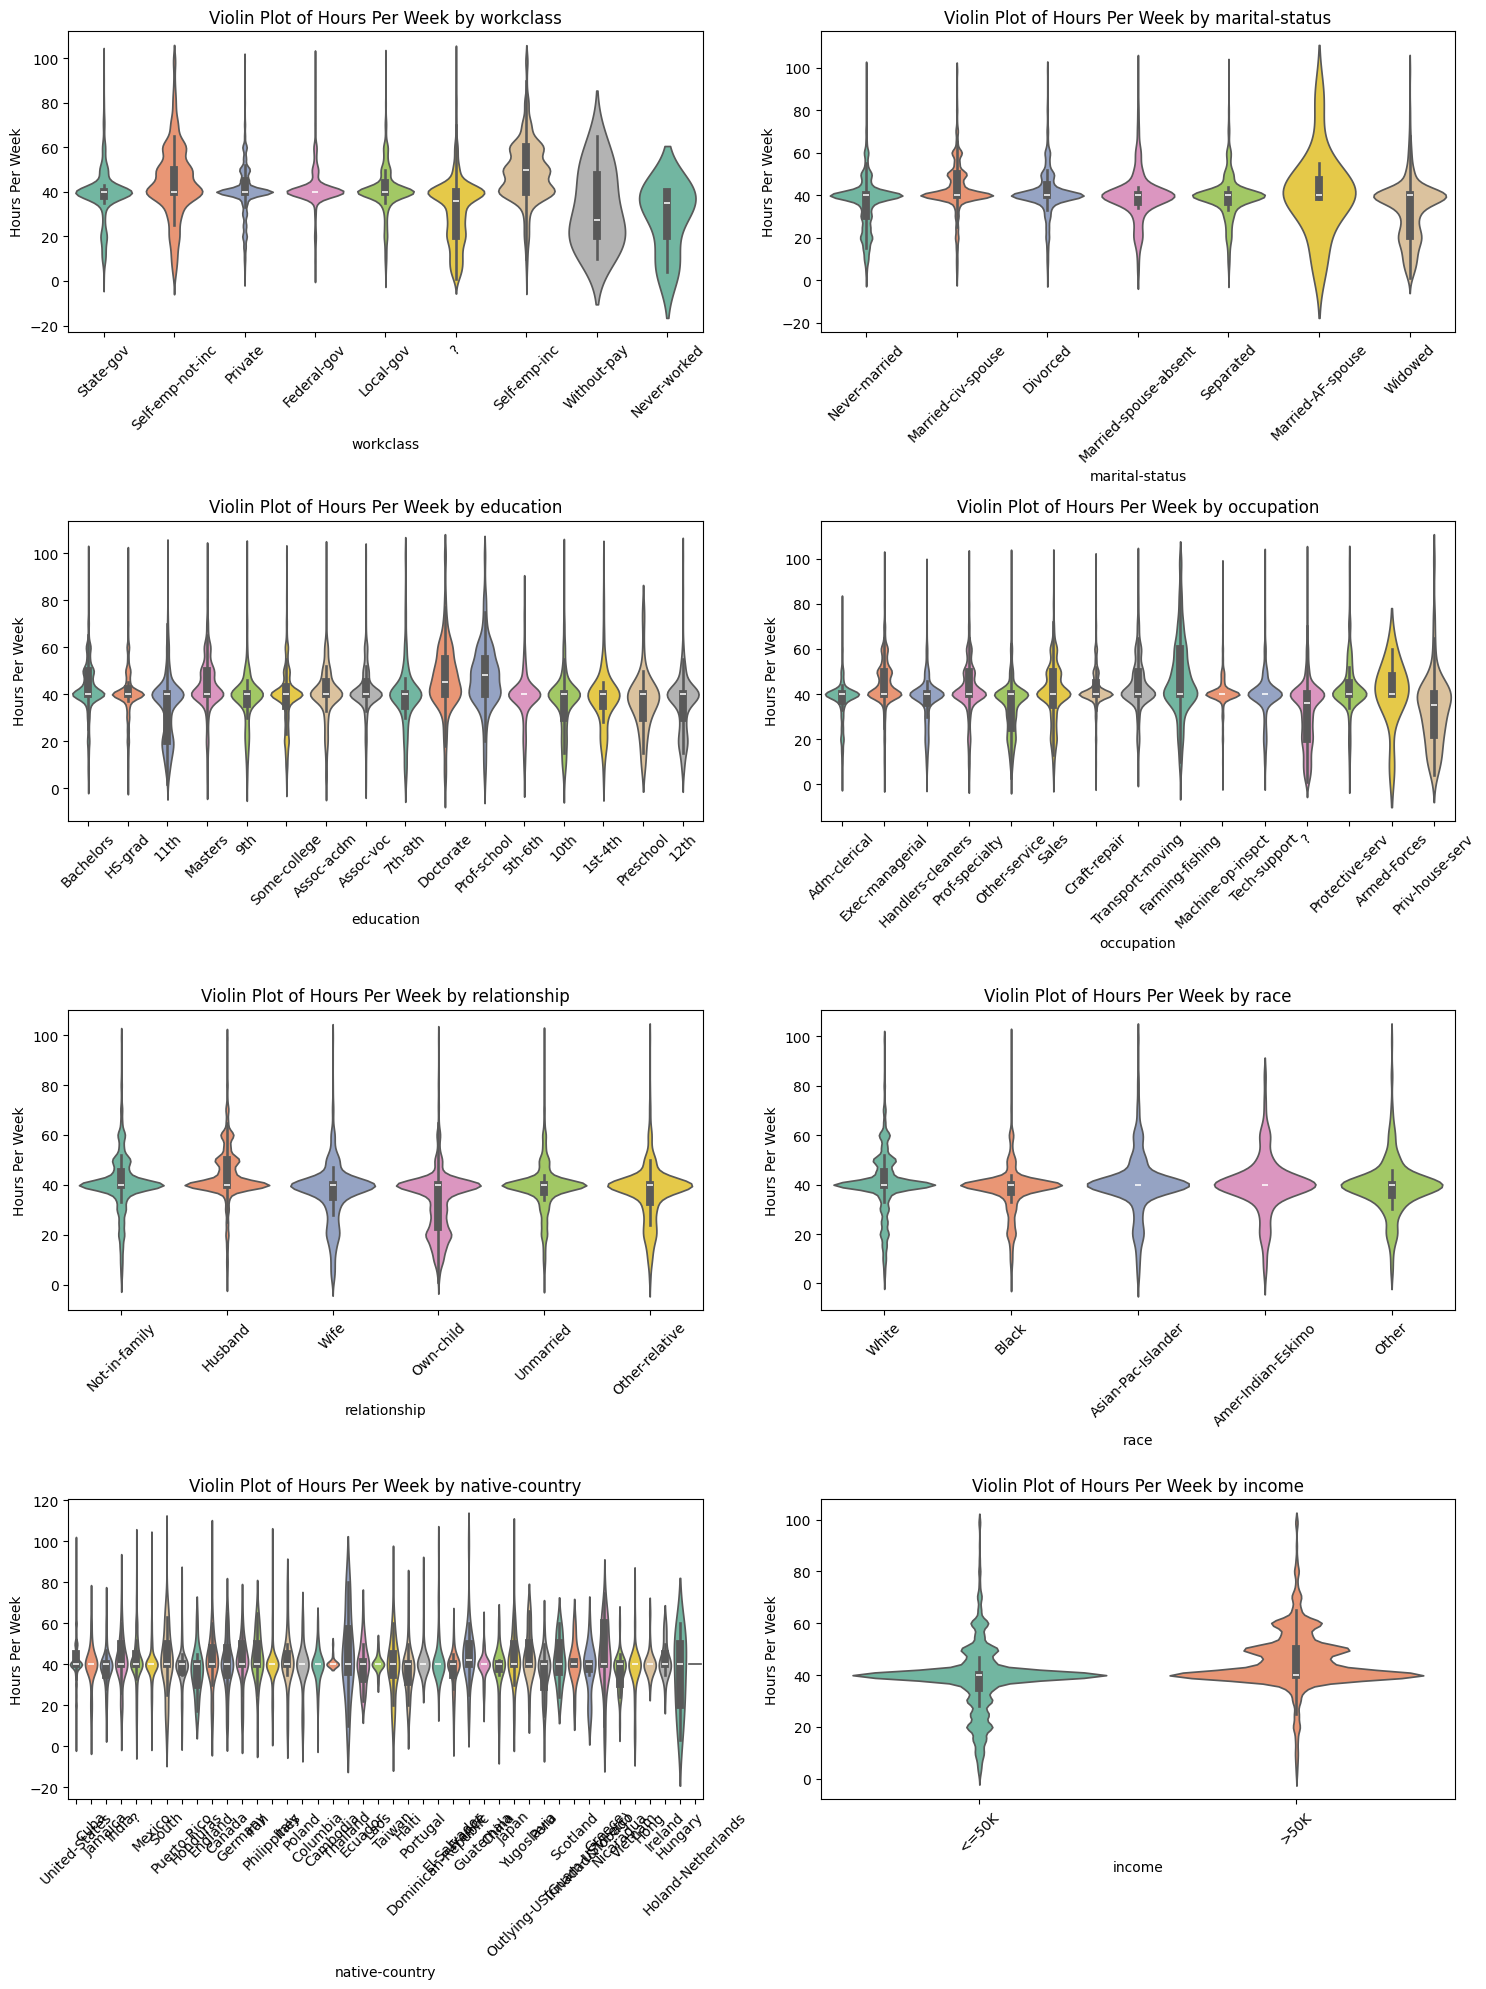

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ["workclass", "marital-status", "education", "occupation", "relationship", "race", "native-country", "income"]

plt.figure(figsize=(15, 20))  
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)  
    sns.violinplot(
        x=data[col], 
        y=data["hours-per-week"], 
        hue=data[col],  
        dodge=False,   
        palette="Set2", 
        legend=False    
    )
    plt.title(f"Violin Plot of Hours Per Week by {col}")
    plt.xticks(rotation=45)  
    plt.xlabel(col)
    plt.ylabel("Hours Per Week")
    
plt.tight_layout()
plt.show()

## Raport

### Variabila hours-per-week
Dupa analiza variabilei tinta, am descoperit o distributie extrem de concentrata in jurul valorii de 40 de ore pe saptamana. Atat histograma, cat si graficul de densitate evidentiaza un varf major in acest punct, sugerand ca majoritatea persoanelor din setul de date raporteaza un program standard de lucru full-time.
Media si mediana sunt aproape identice, in jur de 40 de ore, confirmand ca aceasta este valoarea dominanta in setul de date. Desi majoritatea persoanelor lucreaza intre 40 si 45 de ore pe saptamana, exista cateva cazuri extreme, unde anumiti indivizi raporteaza ca muncesc doar 1 ora pe saptamana sau chiar 99 de ore. Aceste valori iesite din tipar ar putea afecta performanta modelelor de regresie si trebuie luate in considerare in etapa de preprocesare.

Au fost indicate cateva valori lipsa, care ulterior au fost eliminate.

### Distributia variabilelor numerice
Variabila Age prezinta o distributie asimetrica spre dreapta (mai multi tineri decat persoane in varsta). Caapital gain - majoritatea valorilor sunt zero, iar cateva valori extreme sugereaza ca aceasta variabila contine outlieri evidenti. Acesta a fost si motivul pentru care aceasta coloana a fost eliminata. Distributia orelor lucrate pe saptamana este puternic concentrata in jurul a 40 de ore, ceea ce indica o structura aproape discreta a variabilei tinta.
Aceste rezultate sugereaza ca varsta ar putea avea o relatie non-liniara cu orele lucrate, iar capital gain ar putea necesita transformare sau chiar eliminare din model datorita numarului mare de valori extreme.

### Distributia variabilelor categoriale
In ceea ce priveste variabilele categoriale, s-au observat urmatoarele: majoritatea indivizilor sunt angajati in sectorul privat si sunt absolventi de liceu. Cele mai multe persoane sunt casatorite, urmat de persoanele necasatorite.
Aceste date indica faptul ca nivelul de educatie si tipul locului de munca ar putea fi predictori importanti pentru numarul de ore lucrate pe saptamana.

### Identificarea outlierilor - Boxplots
Capital Gain prezinta valori extreme evidente, ceea ce sugereaza ca ar putea fi o variabila problematica pentru modelele de regresie. Orele lucrate pe saptamana au cateva valori anormale, dar impactul acestora pare limitat datorita concentrarii mari in jurul valorii de 40 de ore.

### Corelatie
Cea mai mare corelatie este intre education-num si hours-per-week (0.15), ceea ce sugereaza ca persoanele cu mai multi ani de educatie tind sa lucreze mai multe ore, dar impactul este redus. In mod similar, varsta (age) are o corelatie slaba (0.07), indicand ca numarul de ore lucrate nu variaza semnificativ in functie de varsta.

Variabilele financiare, precum capital-gain si capital-loss, au corelatii aproape inexistente cu hours-per-week, iar fnlwgt (un factor de ponderare) nu are nicio influenta directa.

In concluzie, variabilele numerice nu sunt suficient de puternice pentru a explica variatia numarului de ore lucrate, ceea ce sugereaza ca variabilele categoriale, precum tipul locului de munca, statutul marital sau educatia, ar putea avea un impact mai mare asupra predictiilor.


### Hours-per-week & variabile categoriale
Angajatii din sectorul public lucreaza, in general, mai putine ore decat cei din sectorul privat. Persoanele necasatorite au un program de lucru mai variabil fata de cele casatorite, posibil din cauza unei mai mari flexibilitati. Pe de alta parte, rasa si sexul nu par sa influenteze semnificativ numarul de ore lucrate, indicand ca alti factori, precum tipul locului de munca si statutul marital, joaca un rol mai important in determinarea acestui aspect.

### Concluzii
Analiza variabilei hours-per-week a aratat ca majoritatea angajatilor lucreaza in jur de 40 de ore pe saptamana, cu putine variatii semnificative. Varsta si nivelul de educatie au avut corelatii slabe cu numarul de ore lucrate, in timp ce variabilele financiare nu au avut impact relevant. Diferente mai semnificative au fost observate in functie de tipul locului de munca si statutul marital: angajatii din sectorul public lucreaza mai putin decat cei din sectorul privat, iar persoanele necasatorite au un program mai variabil decat cele casatorite. Rasa si sexul nu au influentat semnificativ orele lucrate, ceea ce sugereaza ca statutul profesional si cel familial sunt factori mai importanti in determinarea timpului de lucru.